In [2]:
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import train_test_split
import plotly.io as pio
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import colormaps
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import CLARA
import nbformat
from sklearn.metrics import silhouette_score

# OPIS

Celem niniejszej pracy jest porównanie  ppularnych metod klastrowania zarówno między sobą jak i między wariantami stosującymi PCA i niestosującymi PCA. Ponadto chcemy zobaczyć sytuacje w któych niektóre metody nie działają dobrze. 
ZBió danych pochodzi z kaggla: https://www.kaggle.com/datasets/tomigelo/spotify-audio-features
są to dane pobrane z Spotify API zawierające parametry ok.130 000 utworów muzycznych. 

Naturalne pytaie jakie się nasuwa przy stosowaniu klastrowania to: Czy klastry ułożą się w gatunki muzyczne? 
Opis zmiennych: 

acousticness: określa stopień wykorzystania instrumentów akustycznych względem elektronicznych.

danceability: ocenia rytmiczność i stabilność tempa pod kątem przydatności do tańca.

duration_ms: całkowita długość utworu wyrażona w milisekundach.

energy: miara intensywności, aktywności oraz subiektywnego poziomu głośności i dynamiki.

instrumentalness: przewiduje prawdopodobieństwo braku wokalu w utworze.

key: główna tonacja utworu zmapowana na liczby całkowite 

liveness: wykrywa obecność publiczności, wskazując na prawdopodobieństwo nagrania koncertowego.

loudness: ogólna głośność utworu mierzona w decybelach (dB).

mode: określa tryb utworu – durowy  lub molowy 

speechiness: mierzy obecność słów mówionych 

tempo: ogólna prędkość utworu mierzona w uderzeniach na minutę (BPM).

time_signature: oszacowanie metrum utworu .

valence: opisuje pozytywny ładunek emocjonalny .

popularity: wskaźnik popularności utworu oparty na liczbie odtworzeń i dacie ich wystąpienia.



Użyjemy 3 algorytmów: K-MEANS, CLARA i DBSCAN. WYkorzytsamy również PCA.

## Eksploracja Danych

In [5]:
#trzeba podmienić na swoja ściezke
df=pd.read_csv("C:/Users/User/Desktop/pca projekt/SpotifyAudioFeaturesApril2019.csv")
print(df.columns)
#rozbicie dfa na dwa jeden z labelami piosenka/autow drugi z dnaymi nuemrycnzymi
df_label=df[['artist_name','track_id','track_name']]
df_num=df.drop(columns=['artist_name','track_id','track_name'])
print(df_num.head(),'\n')
print(df_label.head())

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')
   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.0812    -7.678     1       0.4090  203.927               4    0.118   
1    0.2860    -7.259     1       0.4570  159.009               4    0.371   
2    0.0824    -5.890     0 

### Eksploracja danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      130663 non-null  float64
 1   danceability      130663 non-null  float64
 2   duration_ms       130663 non-null  int64  
 3   energy            130663 non-null  float64
 4   instrumentalness  130663 non-null  float64
 5   key               130663 non-null  int64  
 6   liveness          130663 non-null  float64
 7   loudness          130663 non-null  float64
 8   mode              130663 non-null  int64  
 9   speechiness       130663 non-null  float64
 10  tempo             130663 non-null  float64
 11  time_signature    130663 non-null  int64  
 12  valence           130663 non-null  float64
 13  popularity        130663 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 14.0 MB
None

 NAN COUNT 
 acousticness        0
danceability        0
duratio

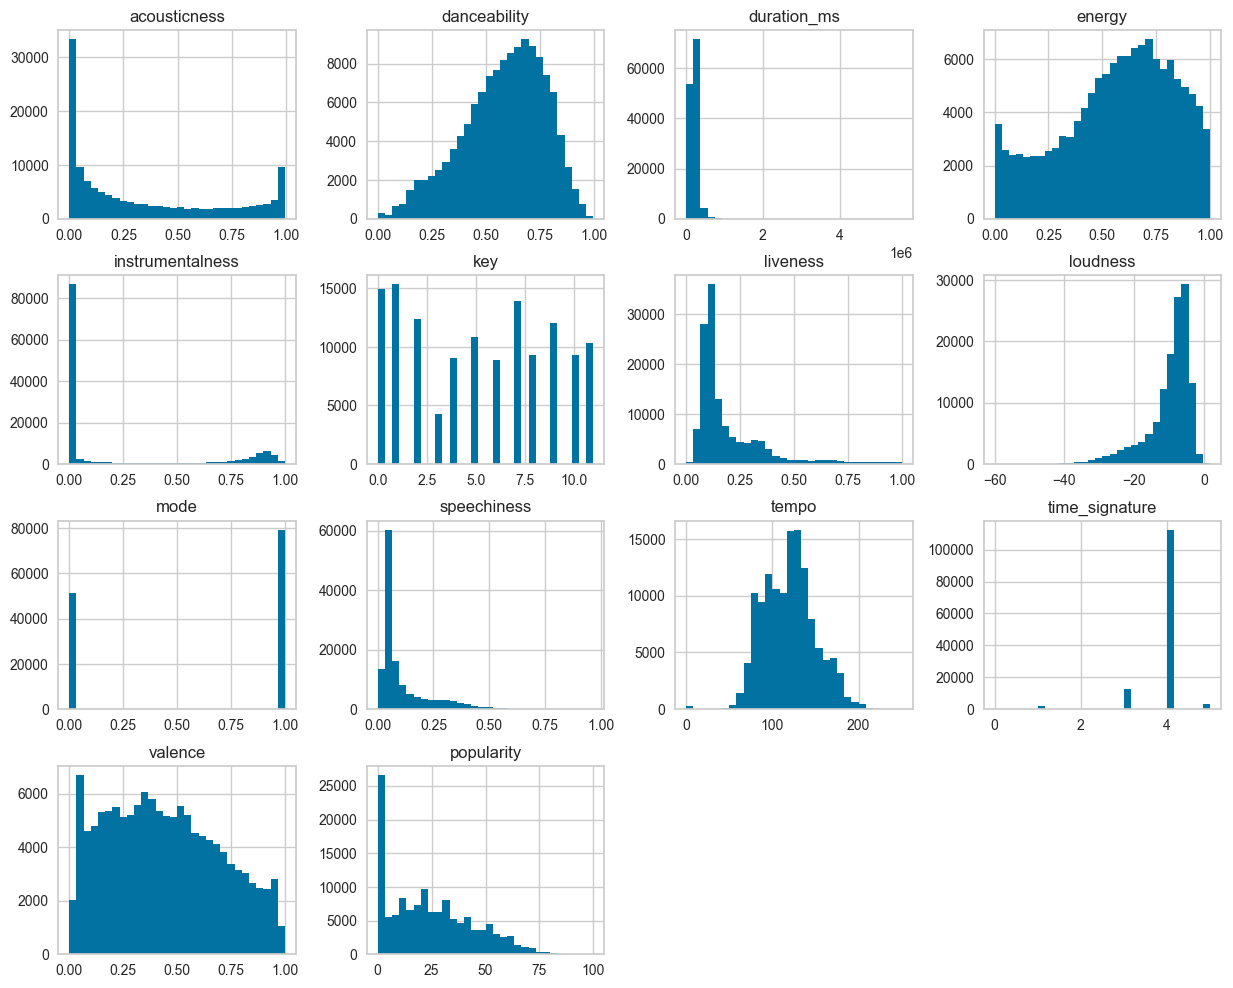

In [7]:
print(df_num.info())
column_nan_count = df_num.isnull().sum()
print('\n','NAN COUNT','\n',column_nan_count) 
df_num=df_num.astype(np.float64)
df_num.hist(bins=30, figsize=(15, 12))
plt.show()


# METODY  Z PCA

## PCA

Standaryzujemy dane i stosujemy PCA. Tworzymy ramki danych przydtane później

In [11]:

scaler=StandardScaler()
df_std=scaler.fit_transform(df_num)
df_std=pd.DataFrame(
    df_std,
    columns=df_num.columns ,
    index=df_num.index
)

In [12]:
pca=PCA()
df_std_pca= pca.fit_transform(df_std)
explained_variance = pca.explained_variance_ratio_
components=pca.components_
df_variance=pd.DataFrame(
    explained_variance.round(4) * 100 ,
    columns=['Explained Variance %'],
    index=[f'PC{i+1}' for i in range (len(explained_variance))]
)
df_pca_components=pd.DataFrame(
    components.round(3),
    columns=df_std.columns,
    index=[f'PC{i+1}' for i in range (len(components))]
            )
df_std_pca=pd.DataFrame(
    df_std_pca,
    columns=[f'PC{i+1}' for i in range(df_num.shape[1])],
    index=df_std.index
)

df_merged=pd.concat([df_variance,df_pca_components], axis=1)



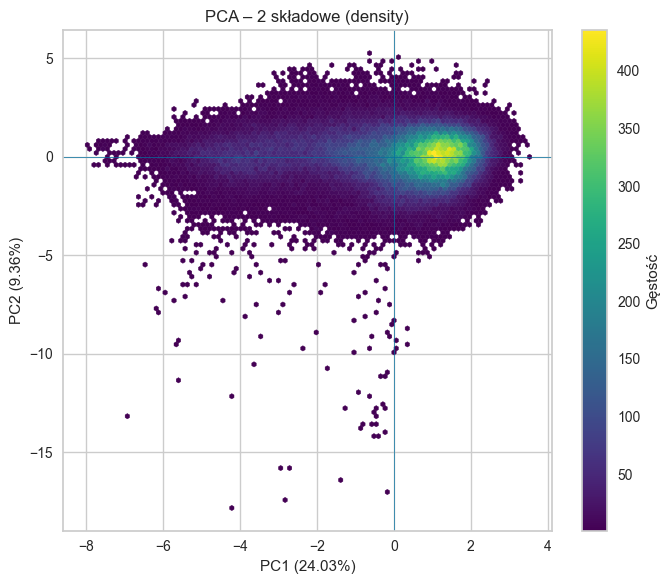

In [13]:
plt.figure(figsize=(7, 6))

hb = plt.hexbin(
    df_std_pca['PC1'], df_std_pca['PC2'],
    gridsize=100,    
    cmap='viridis',
    mincnt=1
)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0].round(4)*100}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1].round(4)*100}%)')
plt.title('PCA – 2 składowe (density)')

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)

plt.colorbar(hb, label='Gęstość')
plt.tight_layout()
plt.show()


Widizmy pierwszy problem z naszymi danymi. Większość danych jest skupiona w jednym punkcie! Będzie to mieć poważne konsekwencje

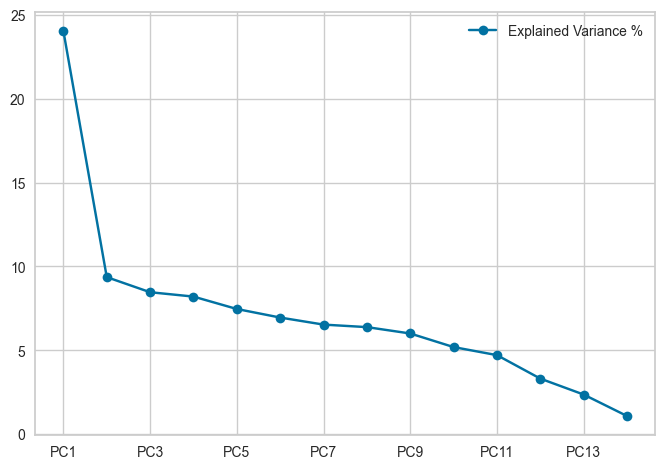

     eigenvalue
PC1    3.363702
PC2    1.309967
PC3    1.184971
PC4    1.147683
PC5    1.044046


In [15]:
df_variance.plot(marker='o')
plt.show()
kaiser=pca.explained_variance_

#wyborilosci PCA kaiserem
df_kaiser=pd.DataFrame(
    kaiser,
    columns=['eigenvalue'],
    index=[f'PC{i+1}' for i in range (len(kaiser))]
)
final_pca=df_kaiser[df_kaiser['eigenvalue']>1]
print((final_pca))

Wykres nr1. przedstawia metodę łockia. Jak widać największy spadek wariacnji jest przy PC1. Następnie wkres spada mniej więcej monotonicznie. Każdy inny wybór będzie 'na oko'. Posłużymy się więc kryterium Kaisera. Jest to heurystyka mówiąca nam 'weź te skłądowe któych wartości własne (eigenvalues) są większe niż 1-> wyjaśniają więcej wariacnji niż oryginalne dane)
Wybieramy więc 5 pierwszych skłąodwych głównych na podstaiwe tego kryterium

In [17]:
df_merged[:len(final_pca)]

Explained Variance %  acousticness  danceability  duration_ms  energy  \
PC1                 24.03        -0.412         0.344       -0.059   0.446   
PC2                  9.36         0.252         0.445       -0.412  -0.306   
PC3                  8.46         0.034         0.058        0.113  -0.059   
PC4                  8.20        -0.015        -0.109       -0.301   0.082   
PC5                  7.46         0.143        -0.057        0.100  -0.120   

     instrumentalness    key  liveness  loudness   mode  speechiness  tempo  \
PC1            -0.321  0.034     0.060     0.471 -0.048        0.150  0.173   
PC2            -0.098  0.030    -0.385    -0.162 -0.013        0.323 -0.157   
PC3            -0.089 -0.600    -0.295     0.087  0.628       -0.239  0.063   
PC4            -0.049 -0.319     0.577    -0.063  0.331        0.374 -0.040   
PC5            -0.434  0.066     0.201     0.046 -0.037        0.208 -0.452   

     time_signature  valence  popularity  
PC1           0.159    0.279       0.149  
PC2           0.022    0.397      -0.042  
PC3           0.050    0.021       0.242  
PC4          -0.289    0.101      -0.323  
PC5          -0.206   -0.186       0.625

Widizmy % wyjaśnianej wariancji i skłąd poszczególnych składowych. Następnie przechodizmy do Kmeans

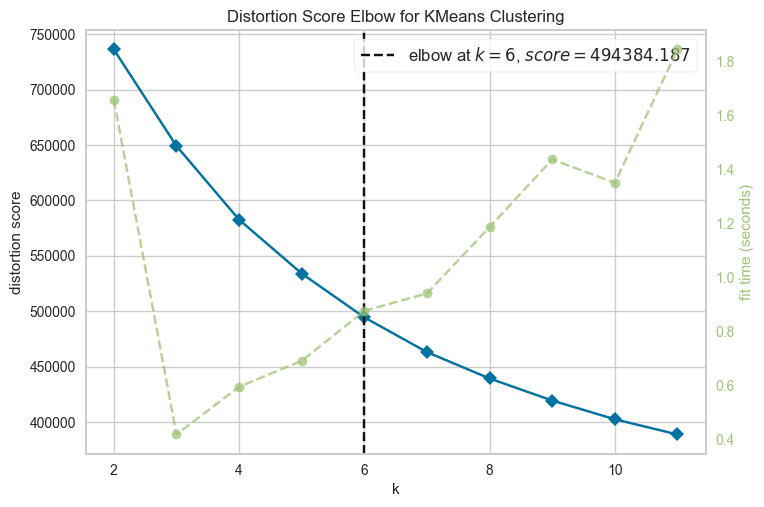

In [19]:
df_clustering = df_std_pca.iloc[:, :len(final_pca)]

kmeans = KMeans(init="k-means++", n_init=10, random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(2, 12))
visualizer.fit(df_clustering)
visualizer.show()
elbow_k = visualizer.elbow_value_

kmeans = KMeans(init="k-means++", n_clusters=elbow_k, n_init=10, random_state=0)


labels = kmeans.fit_predict(df_clustering)


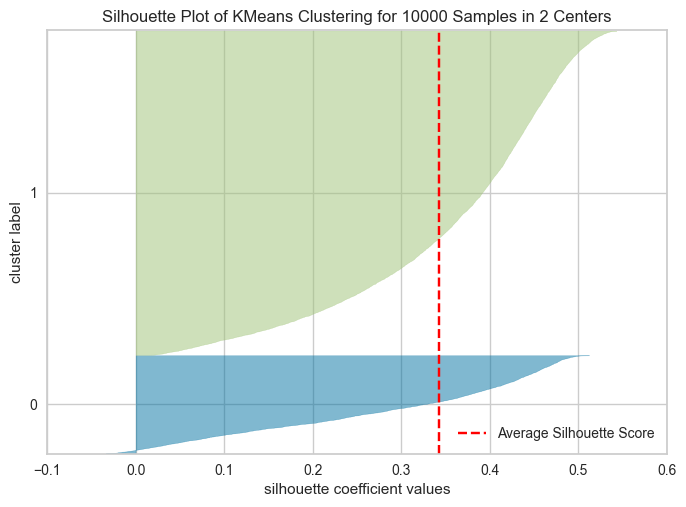

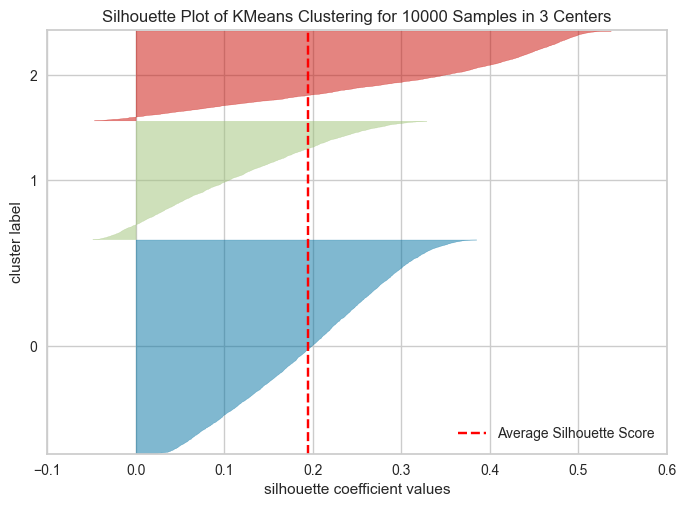

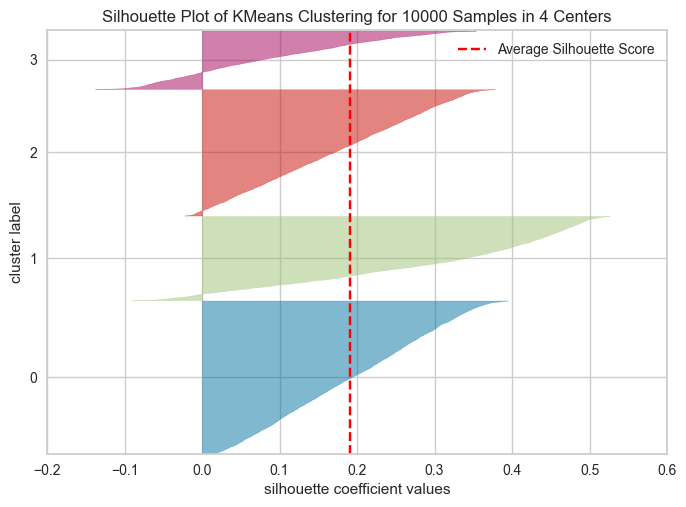

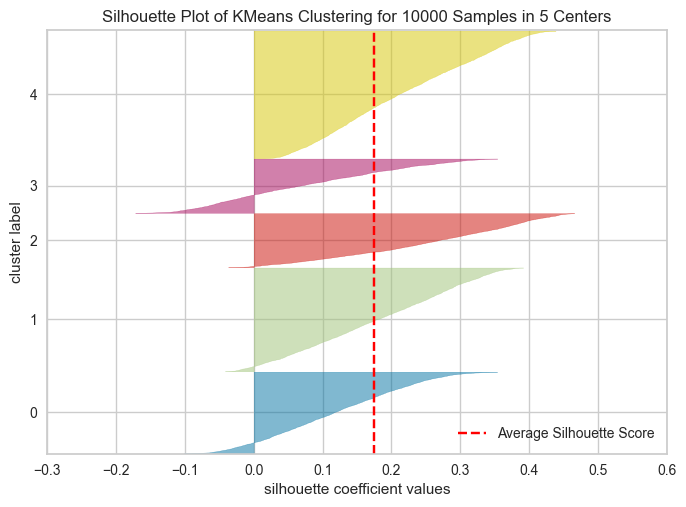

In [20]:
df_sil = df_clustering.sample(10000, random_state=0)

for k in range(2, (df_clustering.shape[1])+1):
    kmeans = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)
    viz = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    viz.fit(df_sil)
    viz.show()

Metoda łokcia wyznacza 6 klastrów. Porównujemy z shilouette score.(Warto zaznaczyć, że jest to zrobione na podpróbce gydż 130k danych zje całą pamięć podręczną komputera i się nie odpali, jeśli nie wyśiwetlają się wszystkie shilouette to dla tego, że było to zbyt obciążające dla komputera). Jak widać najwyższy wynik jest dla 2 klastrów a później jest mniej więcej stała. Z tego powodu wybieramy ilośc klastrów zgodnie z metodą łokcia.

In [22]:
#dataframe taki, że kazda piosenka ma przypsiana nazwe, autora i klaster

df_songs_clusters=pd.DataFrame({'CLusters': labels})
df_songs_clusters['Song Name']=df_label['track_name']
df_songs_clusters['Artist Name']=df_label['artist_name']


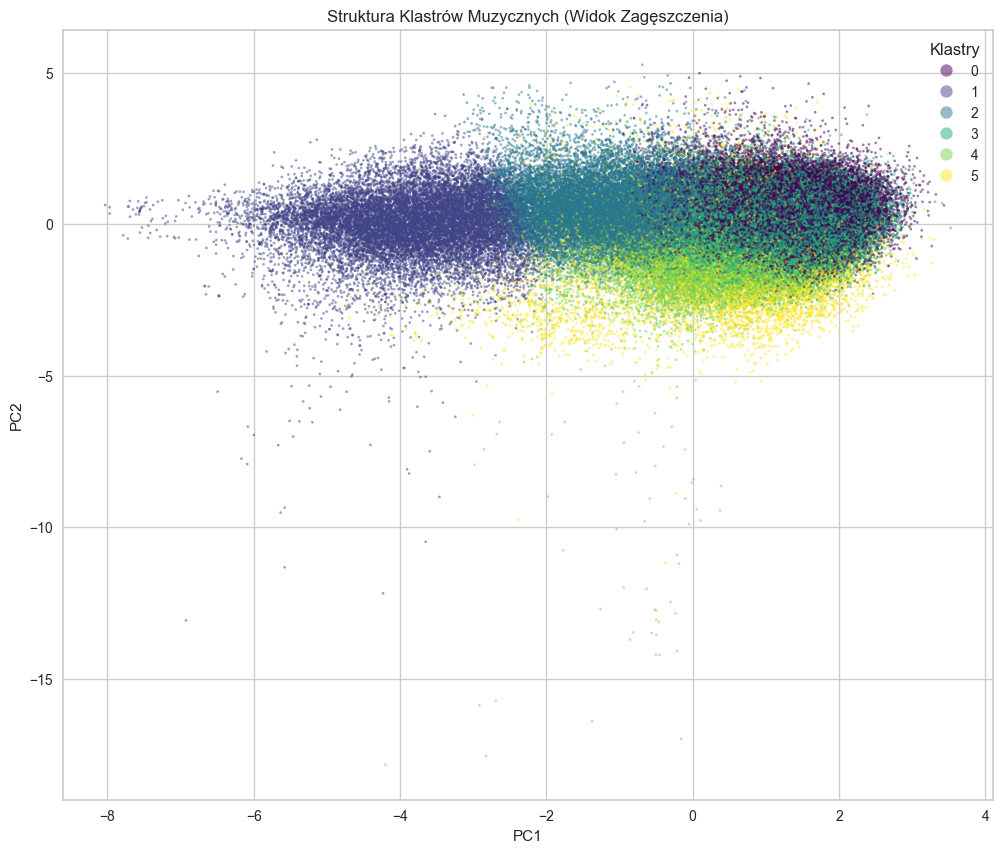

In [23]:

plt.figure(figsize=(12, 10))


sns.scatterplot(
    x=df_clustering.iloc[:, 0], 
    y=df_clustering.iloc[:, 1], 
    hue=labels, 
    palette="viridis", 
    s=3,                
    alpha=0.5,        
    edgecolor=None      
)


plt.legend(title="Klastry", markerscale=5, loc='upper right')

plt.title("Struktura Klastrów Muzycznych (Widok Zagęszczenia)")
plt.show()

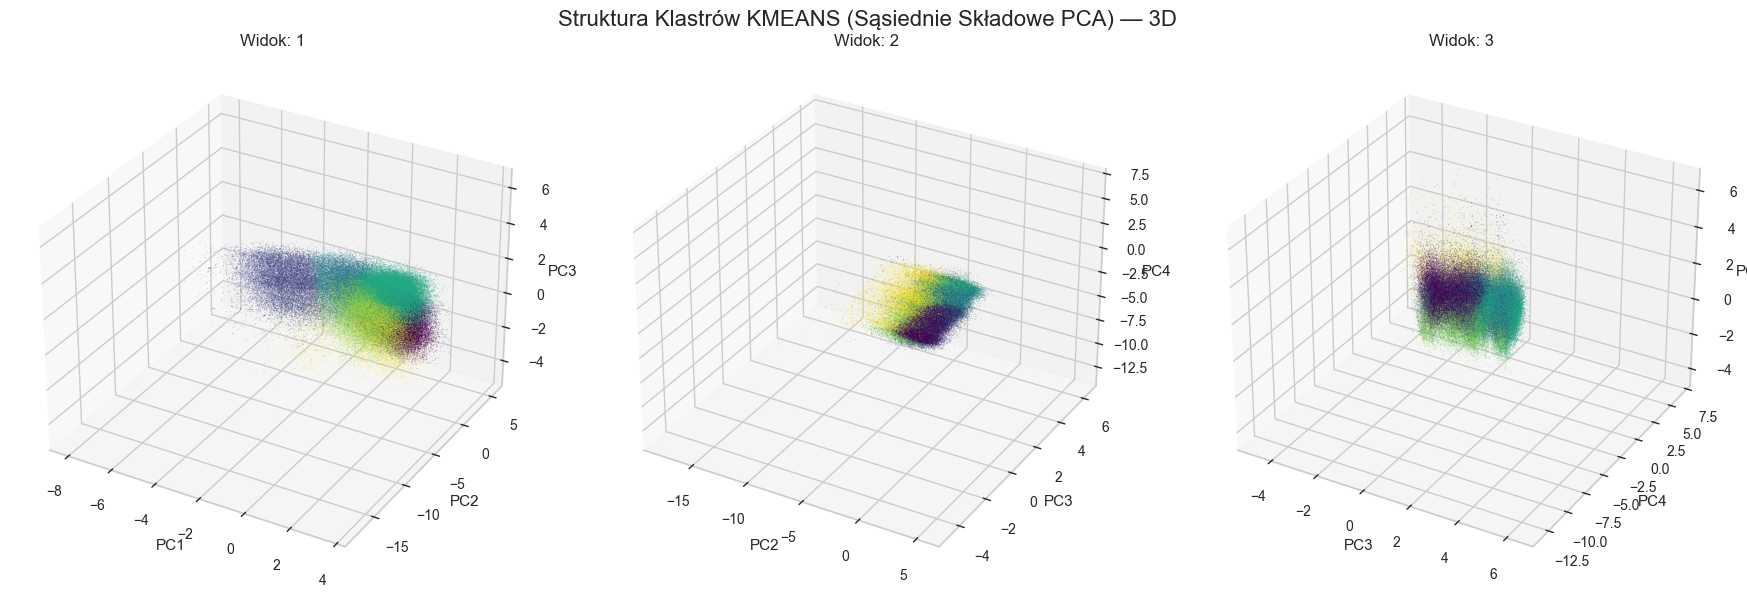

In [24]:
k = len(df_clustering.columns) - 2
ncols = 3
nrows = math.ceil(k / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(18, 6), # Dostosowałem wysokość dla jednego rzędu
    subplot_kw={"projection": "3d"}   
)

# Jeśli k=1, axes nie będzie listą, więc ravel() pomaga zachować spójność
if k > 1:
    axes = axes.ravel()
else:
    axes = [axes]

for i in range(k):
    ax = axes[i]

    # Pobieranie trzech sąsiednich kolumn
    x = df_clustering.iloc[:, i]
    y = df_clustering.iloc[:, i+1]
    z = df_clustering.iloc[:, i+2]

    ax.scatter(
        x, y, z,
        c=labels,          # Twoje etykiety z CLARA
        cmap="viridis",     
        s=0.5,                # Mały punkt dla czytelności 130k danych
        alpha=0.3,            # Przezroczystość
        linewidths=0
    )

    ax.set_xlabel(df_clustering.columns[i])
    ax.set_ylabel(df_clustering.columns[i+1])
    ax.set_zlabel(df_clustering.columns[i+2])
    ax.set_title(f"Widok: {i+1}")

# Wyłączenie zbędnych osi
for j in range(k, len(axes)):
    axes[j].axis("off")

fig.suptitle("Struktura Klastrów KMEANS (Sąsiednie Składowe PCA) — 3D", fontsize=16)
plt.tight_layout()
plt.show()

## DBSCAN dla PCA

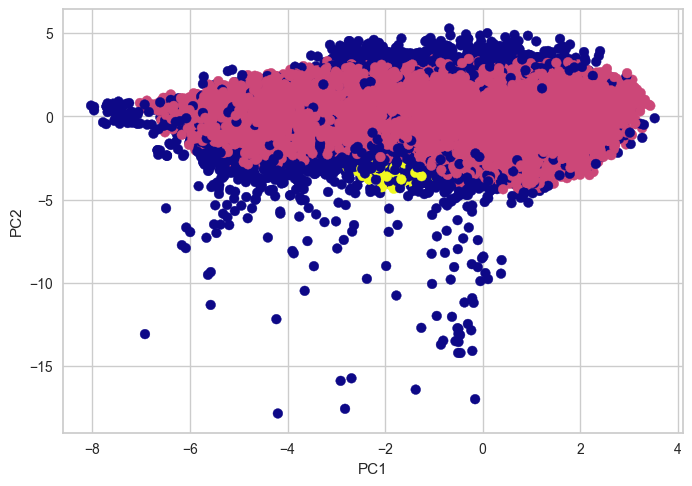

In [26]:
dbscan = DBSCAN(eps=1, min_samples=elbow_k*10)
labels_dbscan = dbscan.fit_predict(df_clustering)
plt.scatter(
    df_clustering.iloc[:, 0], 
    df_clustering.iloc[:, 1], 
    c=labels_dbscan, 
    cmap='plasma'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [27]:
counts = pd.Series(labels_dbscan).value_counts().sort_index()
counts

-1      4037
 0    126463
 1       163
Name: count, dtype: int64

Jak widać DBSCAN jest złym wyborem w tym wypadku. Przez to, że dane są silnie zgrupowane ze sobą DBSCAN widzi je jako jedną wielką grupę. zmiana parametrów eps czy min_samples nie zmienia tych wniosków, conajwyżej dbscan utworzy bardzo dużo grup zawierających bardzo mało obserwacji. Widać też, że algorytm dużą ilośc danych przypisuje jako elementy odstające

## CLARA DLA PCA

In [30]:
clara_pca = CLARA(n_clusters=elbow_k, random_state=42)
clara_pca.fit(df_clustering)
clara_pca = clara_pca.labels_

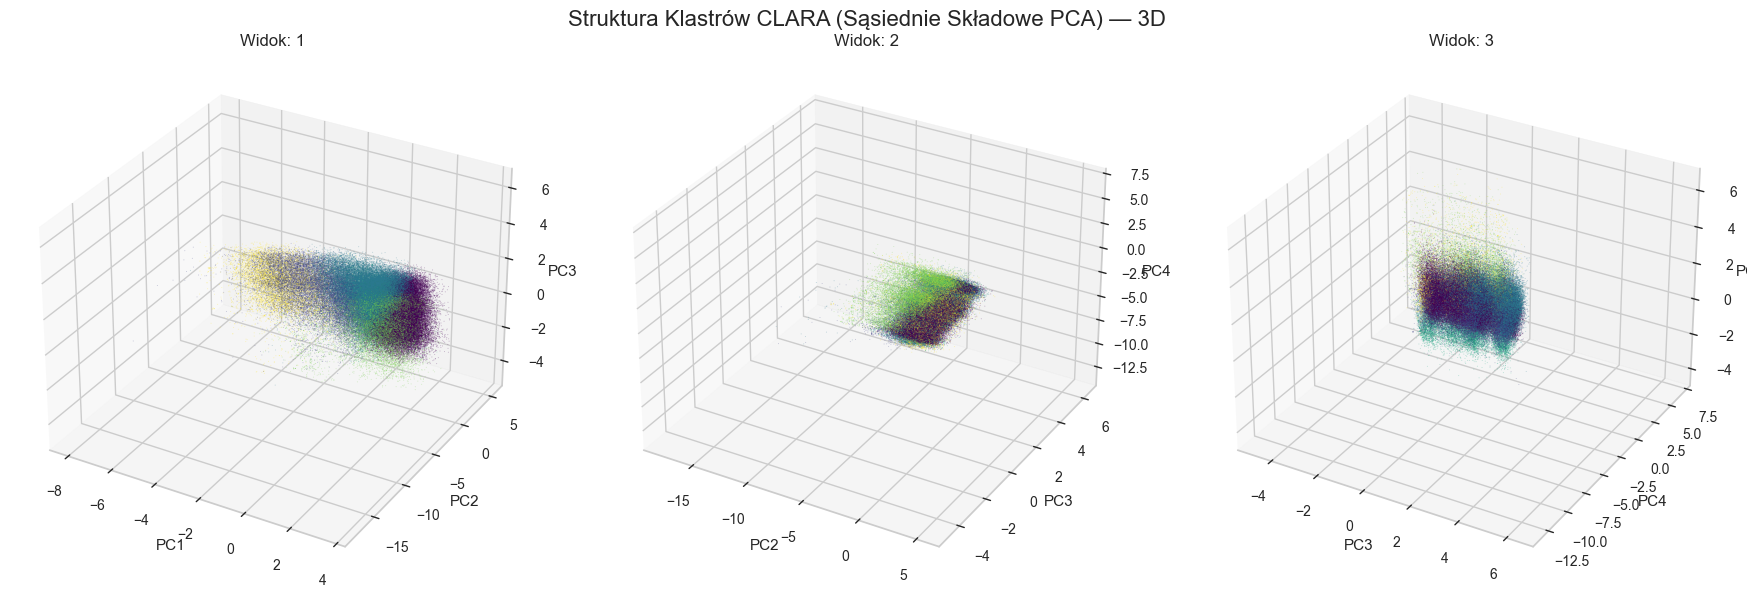

In [31]:
k = len(df_clustering.columns) - 2
ncols = 3
nrows = math.ceil(k / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(18, 6), # Dostosowałem wysokość dla jednego rzędu
    subplot_kw={"projection": "3d"}   
)

# Jeśli k=1, axes nie będzie listą, więc ravel() pomaga zachować spójność
if k > 1:
    axes = axes.ravel()
else:
    axes = [axes]

for i in range(k):
    ax = axes[i]

    # Pobieranie trzech sąsiednich kolumn
    x = df_clustering.iloc[:, i]
    y = df_clustering.iloc[:, i+1]
    z = df_clustering.iloc[:, i+2]

    ax.scatter(
        x, y, z,
        c=clara_pca,          # Twoje etykiety z CLARA
        cmap="viridis",     
        s=0.5,                # Mały punkt dla czytelności 130k danych
        alpha=0.3,            # Przezroczystość
        linewidths=0
    )

    ax.set_xlabel(df_clustering.columns[i])
    ax.set_ylabel(df_clustering.columns[i+1])
    ax.set_zlabel(df_clustering.columns[i+2])
    ax.set_title(f"Widok: {i+1}")

# Wyłączenie zbędnych osi
for j in range(k, len(axes)):
    axes[j].axis("off")

fig.suptitle("Struktura Klastrów CLARA (Sąsiednie Składowe PCA) — 3D", fontsize=16)
plt.tight_layout()
plt.show()

Wykres CLARA jest bardzo podobny do wykresów K means

#  METODY BEZ PCA

Powtarzamy tym razem bez PCA tylko na surowych danych


### K MEANS BEZ PCA


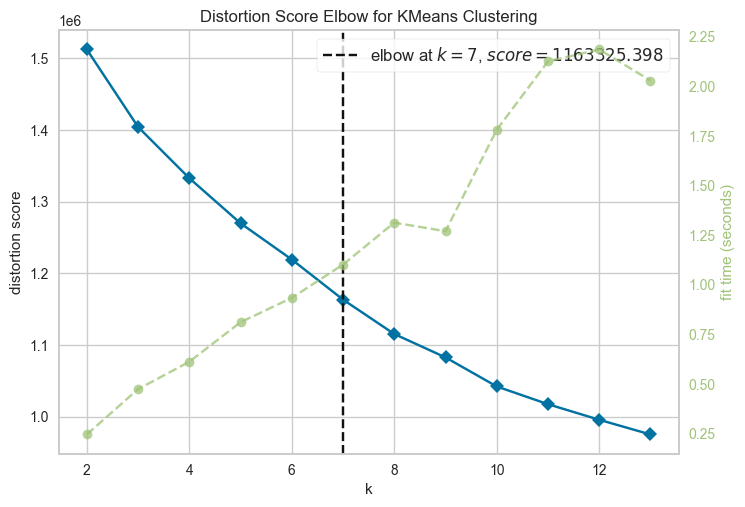

In [36]:
scaler2=StandardScaler()
df_kmeans=scaler2.fit_transform(df_num)

kmeans2 = KMeans( init="k-means++",n_clusters=6, n_init=10, random_state=10)
visualizer = KElbowVisualizer(kmeans2, k=(2, 14))
visualizer.fit(df_kmeans)
visualizer.show()
kmeans2_elbow=visualizer.elbow_value_
kmeans2=KMeans( init="k-means++",n_clusters=kmeans2_elbow, n_init=10, random_state=10)
labels2=kmeans2.fit_predict(df_kmeans)

df_kmeans2=pd.DataFrame(
    df_kmeans,
    index=df_num.index,
    columns=df_num.columns
)

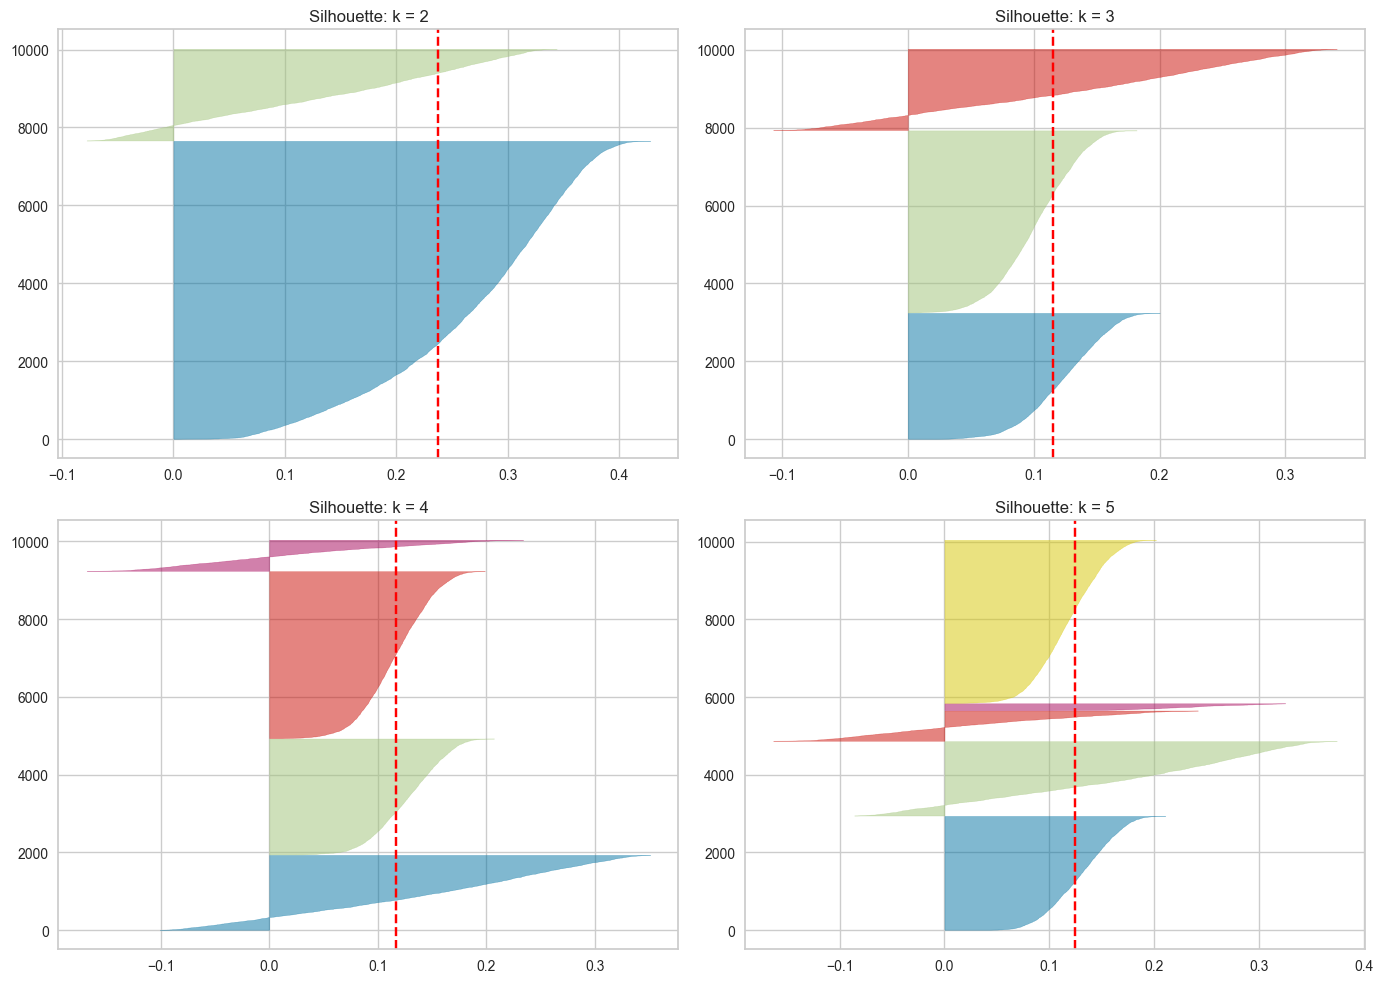

In [37]:
df_sil2 = df_kmeans2.sample(10000, random_state=0)

ks = list(range(2, kmeans2_elbow-1))          
i = len(ks)
ncols = 2
nrows = math.ceil(i / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 10))
axes = axes.ravel()

for idx, k in enumerate(ks):

    ax = axes[idx]

    kmeans = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)

    viz = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    viz.fit(df_sil2)

    ax.set_title(f"Silhouette: k = {k}")

plt.tight_layout()

plt.savefig('shilouetter kmeans.png')

plt.show()


Podobnie jak w przypadku PCA, shilouette jest stałe po N=2. wybeiramy metodą łokcia ilość klastrów

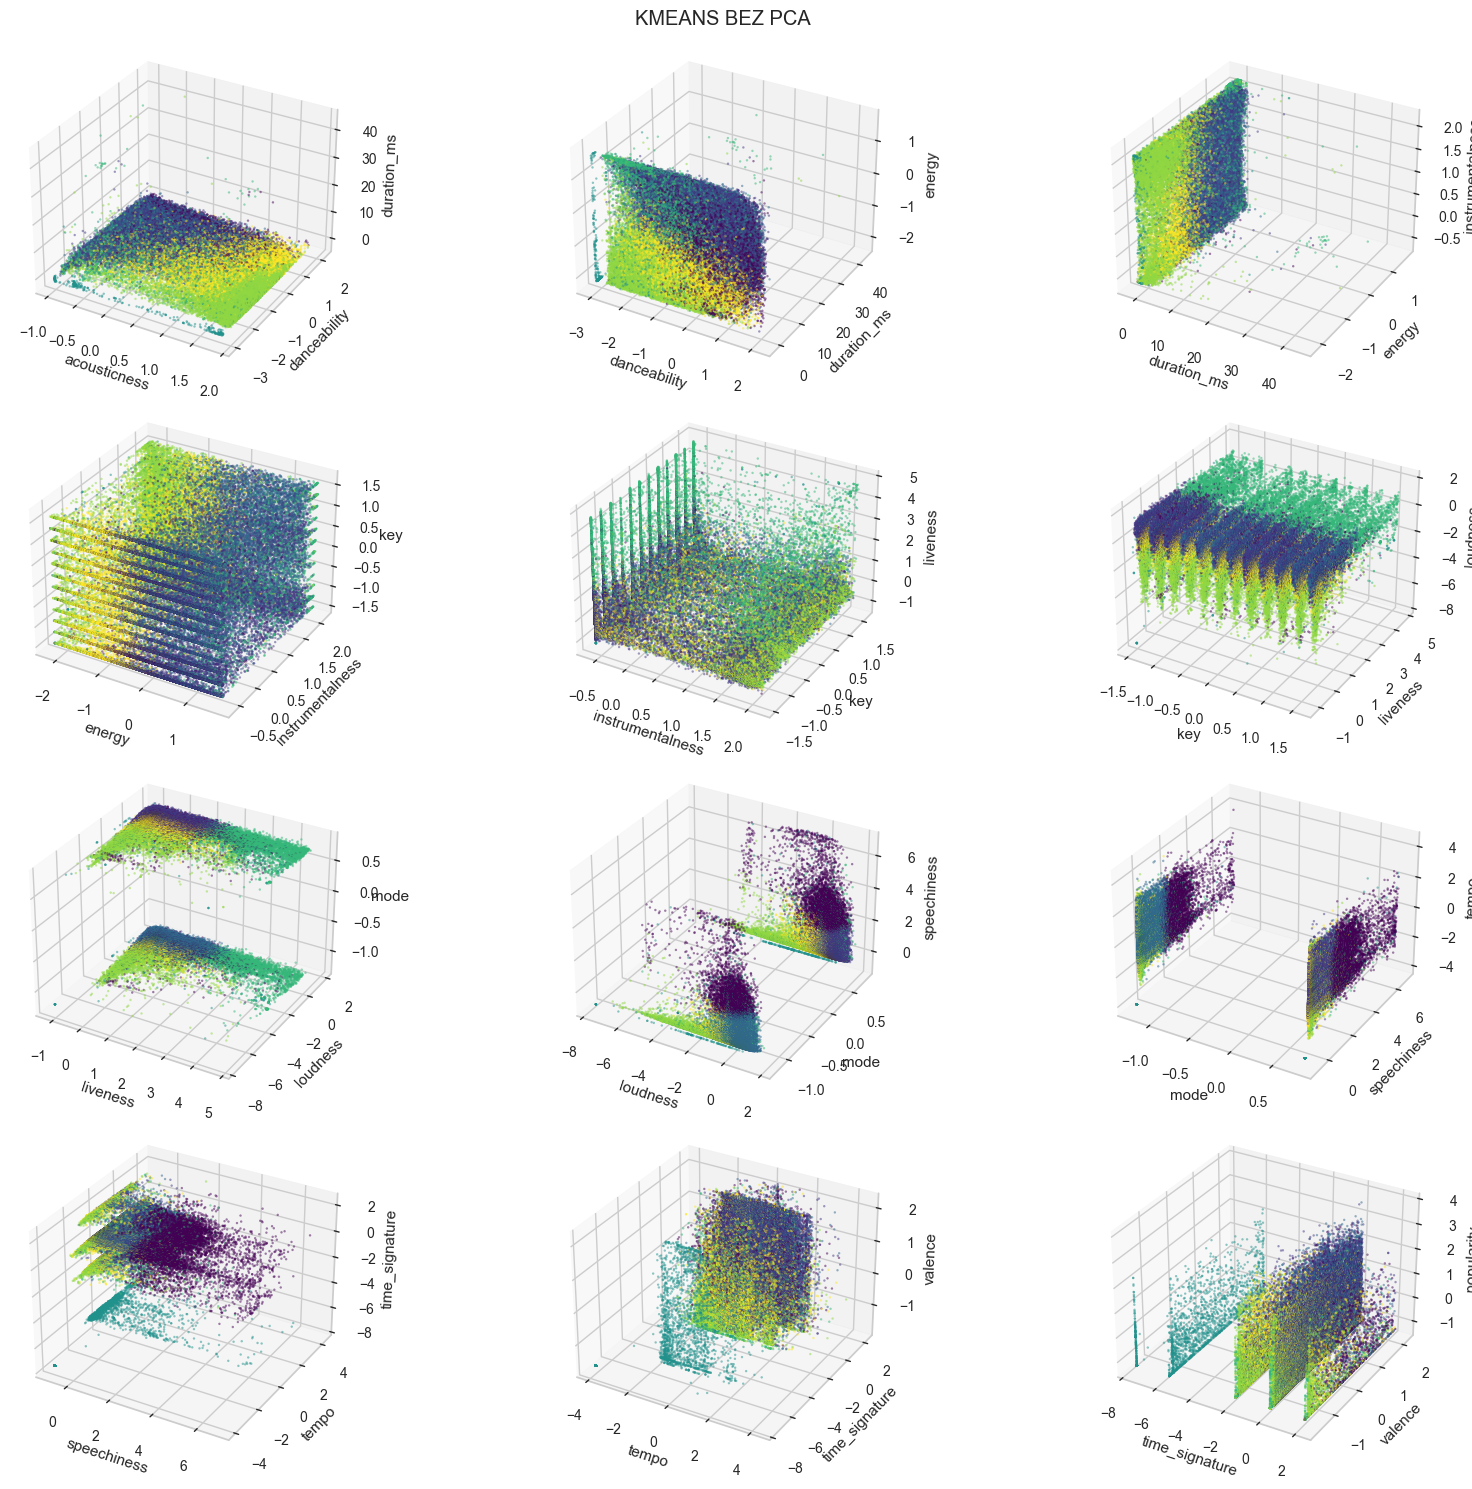

In [39]:

k = len(df_kmeans2.columns) - 2
ncols = 3
nrows = math.ceil(k / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(18, 15),
    subplot_kw={"projection": "3d"}   
)
axes = axes.ravel()

for i in range(k):
    ax = axes[i]

    x = df_kmeans2.iloc[:, i]
    y = df_kmeans2.iloc[:, i+1]
    z = df_kmeans2.iloc[:, i+2]

    ax.scatter(
        x, y, z,
        c=labels2,          
        cmap="viridis",     
        s=3,
        alpha=0.5,
        linewidths=0
    )

    ax.set_xlabel(df_kmeans2.columns[i])
    ax.set_ylabel(df_kmeans2.columns[i+1])
    ax.set_zlabel(df_kmeans2.columns[i+2])

for j in range(k, len(axes)):
    axes[j].axis("off")

fig.suptitle("KMEANS BEZ PCA")
plt.tight_layout()
plt.show()
plt.close()

## DBSCAN BEZ PCA

In [41]:
dbscan = DBSCAN(eps=1, min_samples=kmeans2_elbow*10)
labels_dbscan_nopca = dbscan.fit_predict(df_kmeans)

In [42]:
counts2 = pd.Series(labels_dbscan_nopca).value_counts().sort_index()
counts2

-1    123170
 0      5338
 1      2012
 2        90
 3        53
Name: count, dtype: int64

Podobnie jak z użyciem PCA dbscan nie nadaje sie do tych danych

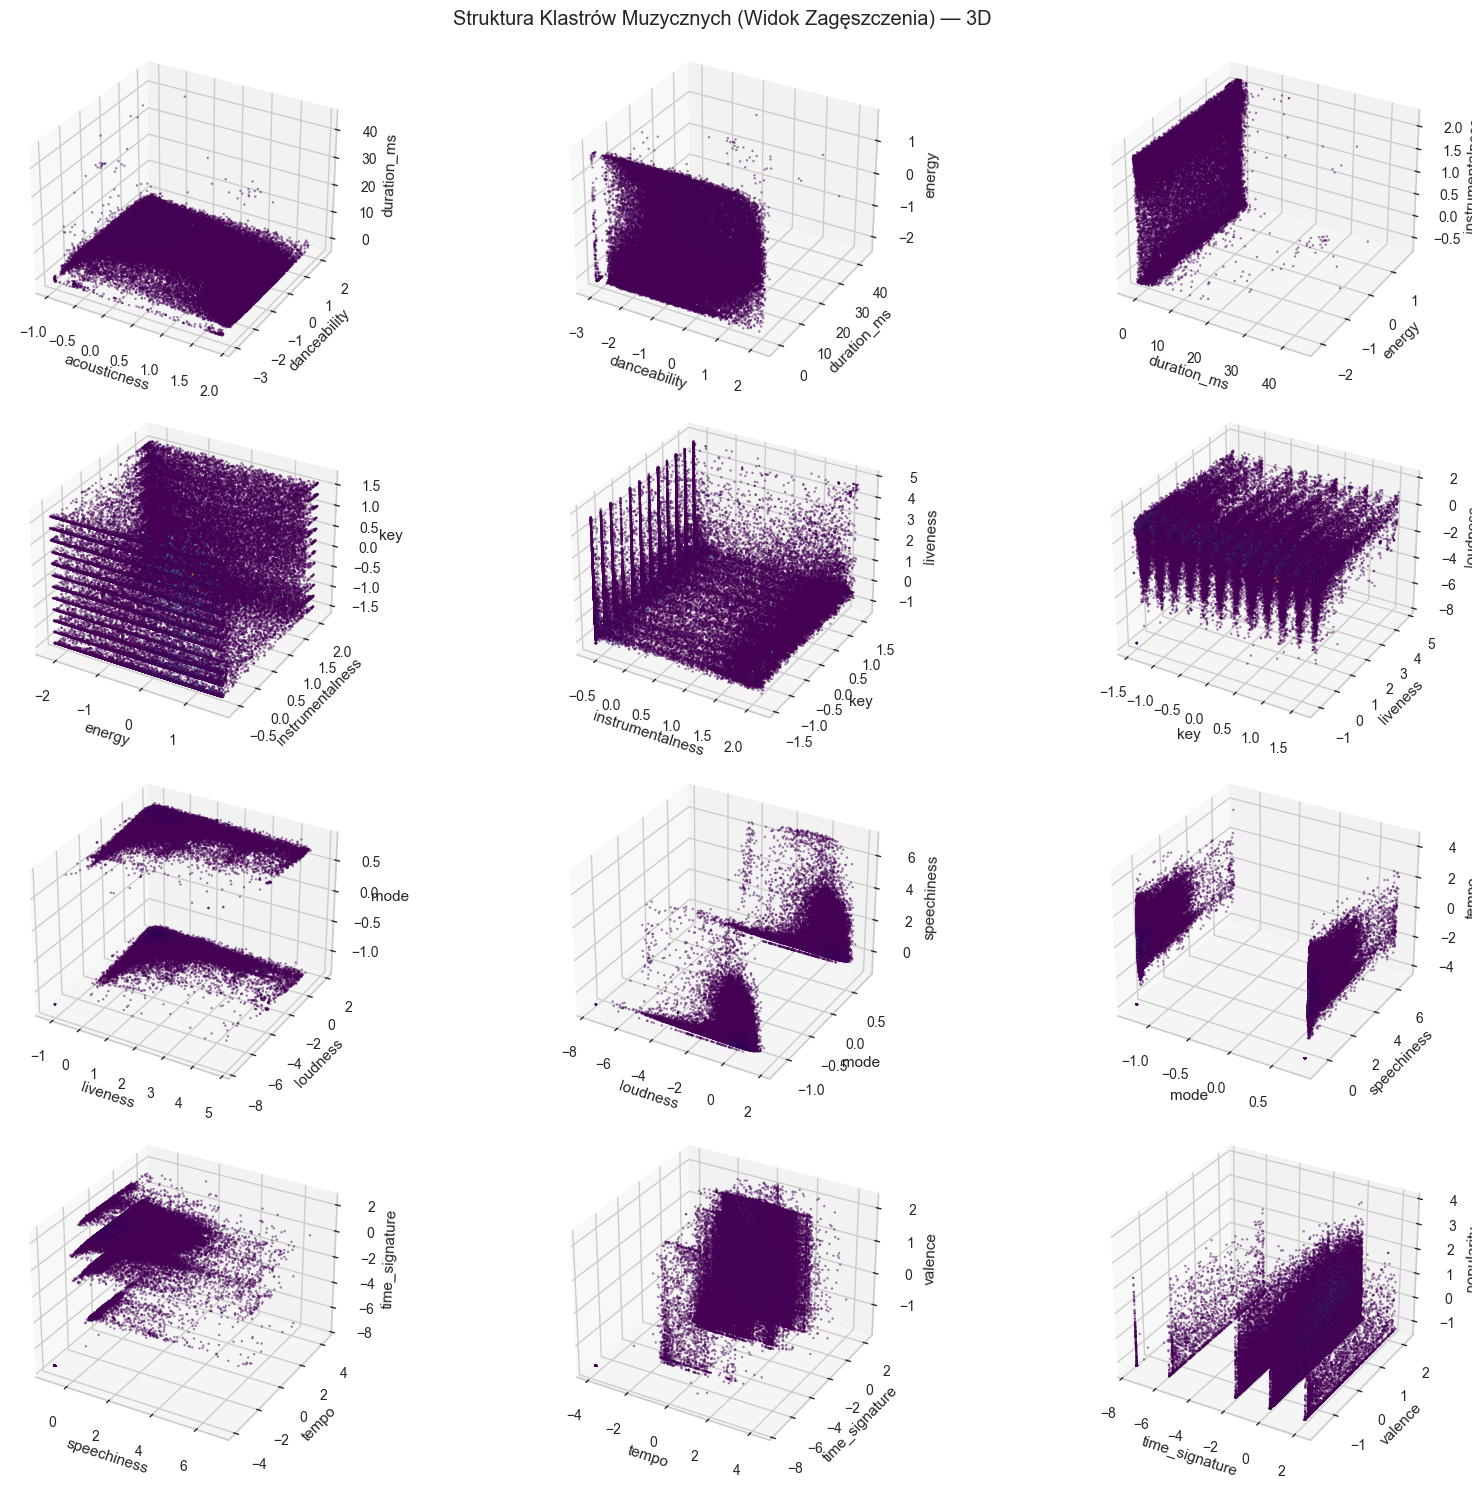

In [44]:

k = len(df_kmeans2.columns) - 2
ncols = 3
nrows = math.ceil(k / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(18, 15),
    subplot_kw={"projection": "3d"}   
)
axes = axes.ravel()

for i in range(k):
    ax = axes[i]

    x = df_kmeans2.iloc[:, i]
    y = df_kmeans2.iloc[:, i+1]
    z = df_kmeans2.iloc[:, i+2]

    ax.scatter(
        x, y, z,
        c=labels_dbscan_nopca,          
        cmap="viridis",     
        s=3,
        alpha=0.5,
        linewidths=0
    )

    ax.set_xlabel(df_kmeans2.columns[i])
    ax.set_ylabel(df_kmeans2.columns[i+1])
    ax.set_zlabel(df_kmeans2.columns[i+2])

for j in range(k, len(axes)):
    axes[j].axis("off")

fig.suptitle("Struktura Klastrów Muzycznych (Widok Zagęszczenia) — 3D")
plt.tight_layout()

In [45]:
clara_org = CLARA(n_clusters=kmeans2_elbow, random_state=42)
clara_org.fit(df_kmeans2)
clara_nopca = clara_org.labels_

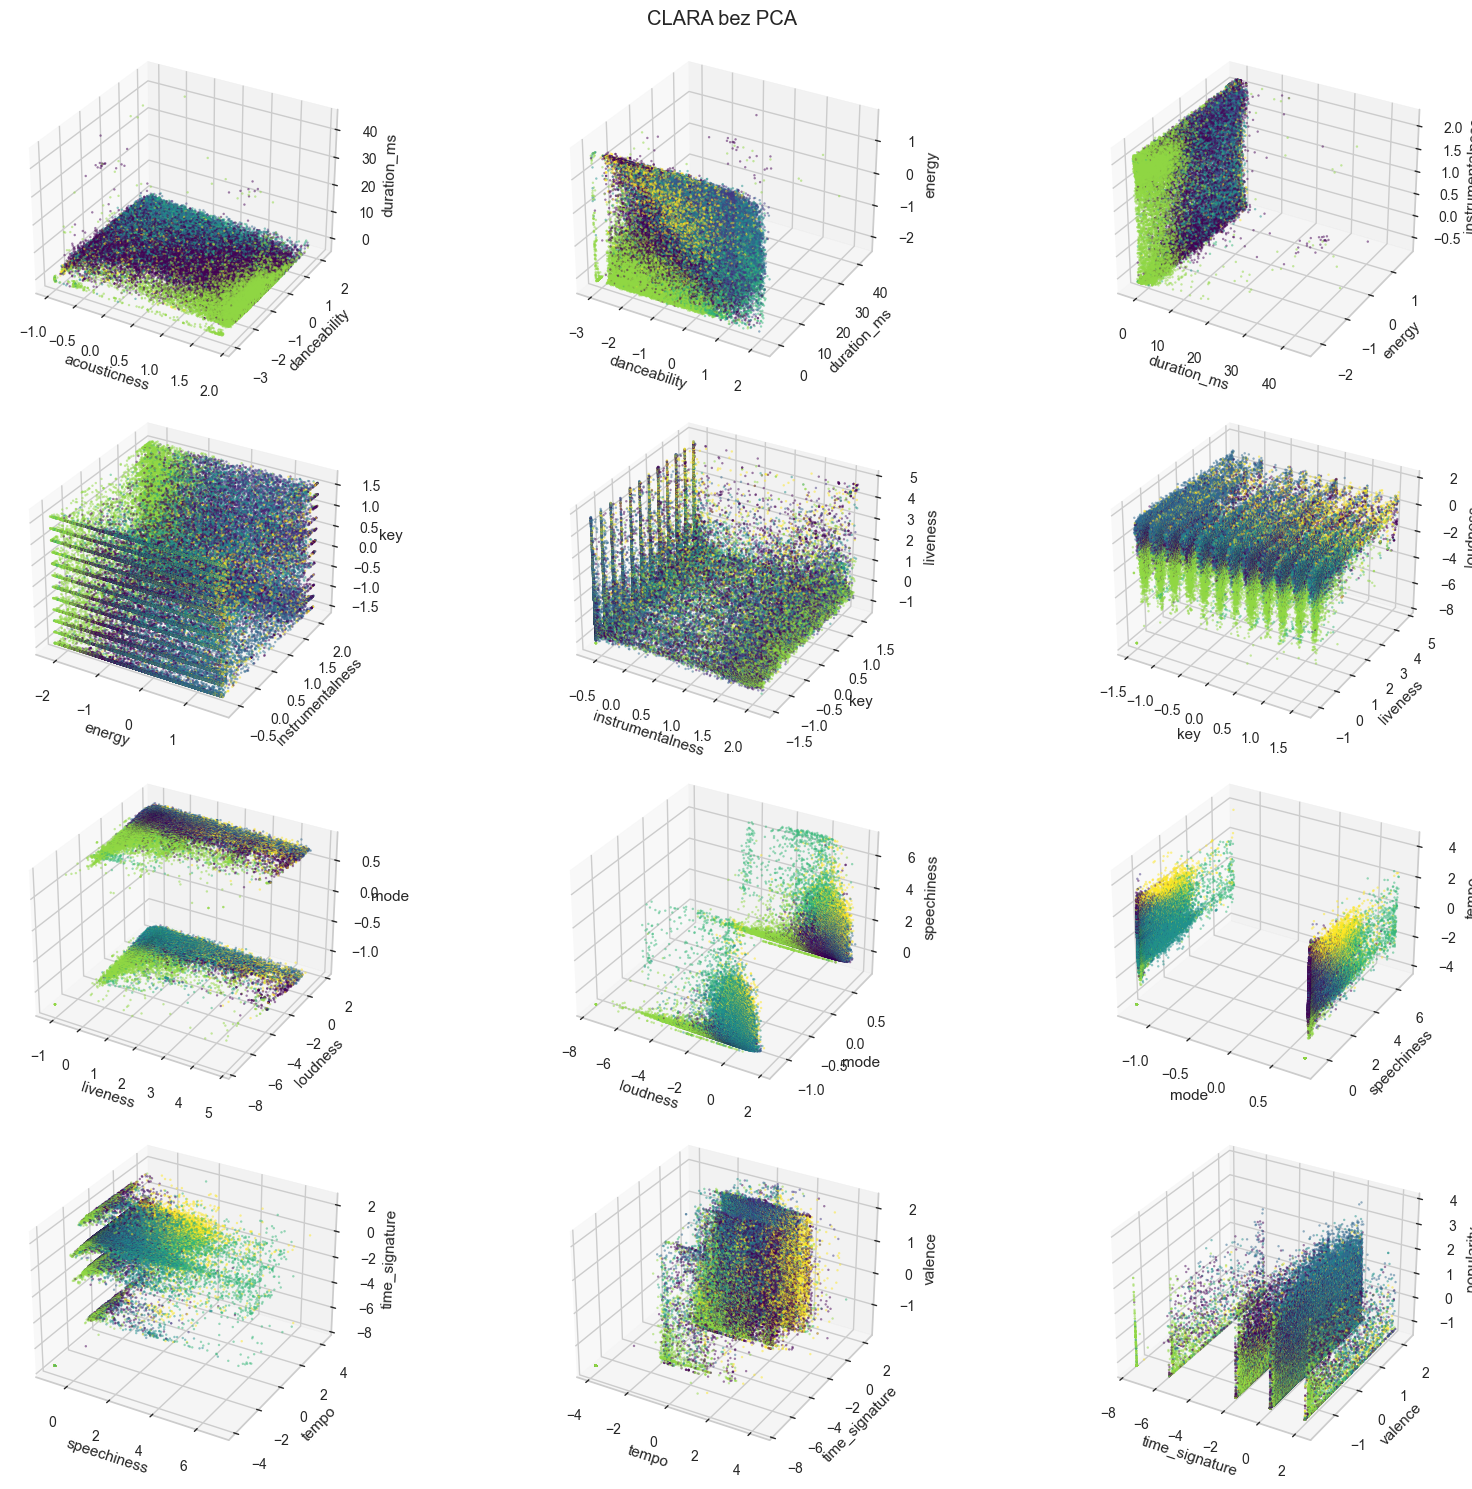

In [46]:

k = len(df_kmeans2.columns) - 2
ncols = 3
nrows = math.ceil(k / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(18, 15),
    subplot_kw={"projection": "3d"}   
)
axes = axes.ravel()

for i in range(k):
    ax = axes[i]

    x = df_kmeans2.iloc[:, i]
    y = df_kmeans2.iloc[:, i+1]
    z = df_kmeans2.iloc[:, i+2]

    ax.scatter(
        x, y, z,
        c=clara_nopca,          
        cmap="viridis",     
        s=3,
        alpha=0.5,
        linewidths=0
    )

    ax.set_xlabel(df_kmeans2.columns[i])
    ax.set_ylabel(df_kmeans2.columns[i+1])
    ax.set_zlabel(df_kmeans2.columns[i+2])

for j in range(k, len(axes)):
    axes[j].axis("off")

fig.suptitle("CLARA bez PCA")
plt.tight_layout()

# PORÓWNANIE

NIe rozważamy DBSCANu bo wyszedł fatalnie w obu wariantach i nie ma sensu go rozpatrywać.

Porównojemy za pomocą wskaźnika calinskiego-harabasza

In [52]:
from sklearn.metrics import calinski_harabasz_score

ch_kmeans_nopca = calinski_harabasz_score(df_kmeans2, labels2)
ch_kmeans_pca = calinski_harabasz_score(df_clustering, labels)
ch_clara_nopca = calinski_harabasz_score(df_kmeans2, clara_nopca)
ch_clara_pca = calinski_harabasz_score(df_clustering, clara_pca)

print(f"KMeans bez PCA: {ch_kmeans_nopca:.1f}")
print(f"KMeans z PCA: {ch_kmeans_pca:.1f}")
print(f"CLARA bez PCA: {ch_clara_nopca:.1f}")
print(f"CLARA z PCA: {ch_clara_pca:.1f}")

KMeans bez PCA: 12465.9
KMeans z PCA: 29467.1
CLARA bez PCA: 8878.3
CLARA z PCA: 23114.0


Widać, że zastsoownaie PCA znacząco podnosi wyniki, wniosek: PCA polepsza klastrowanie, sczegolnie dla danych które są dość mocno skupione i podobne do siebie.

In [51]:


df_temp = df_kmeans2.copy()
df_temp['Cluster'] = labels2
print("=== KMeans bez PCA ===")
print(df_temp.groupby('Cluster').mean().round(3))
print(f"\nLiczba piosenek:\n{df_temp.groupby('Cluster').size()}\n")


df_temp = df_kmeans2.copy()  
df_temp['Cluster'] = labels  
print("\n=== KMeans z PCA (oryginalne cechy) ===")
print(df_temp.groupby('Cluster').mean().round(3))
print(f"\nLiczba piosenek:\n{df_temp.groupby('Cluster').size()}\n")


df_temp = df_kmeans2.copy()
df_temp['Cluster'] = clara_nopca
print("\n=== CLARA bez PCA ===")
print(df_temp.groupby('Cluster').mean().round(3))
print(f"\nLiczba piosenek:\n{df_temp.groupby('Cluster').size()}\n")


df_temp = df_kmeans2.copy()  
df_temp['Cluster'] = clara_pca  
print("\n=== CLARA z PCA (oryginalne cechy) ===")
print(df_temp.groupby('Cluster').mean().round(3))
print(f"\nLiczba piosenek:\n{df_temp.groupby('Cluster').size()}")

=== KMeans bez PCA ===
         acousticness  danceability  duration_ms  energy  instrumentalness  \
Cluster                                                                      
0              -0.209         0.603       -0.264   0.067            -0.494   
1              -0.574         0.284       -0.005   0.542            -0.218   
2              -0.509         0.349        0.013   0.473            -0.176   
3               0.629        -1.059       -0.370  -0.738             0.419   
4              -0.353        -0.500        0.153   0.656             0.002   
5               1.542        -1.368        0.343  -1.612             1.428   
6               1.016        -0.188       -0.112  -0.858            -0.066   

           key  liveness  loudness   mode  speechiness  tempo  time_signature  \
Cluster                                                                         
0       -0.034    -0.005     0.112 -0.023        2.241  0.081           0.210   
1       -0.154    -0.195     0.

Metody bez PCA częściej wyodrębniają klastry na podstawie błędów w danych lub ekstremalnych wartości pojedynczych cech (jak nietypowe metrum), podczas gdy PCA wymusza na algorytmach skupienie się na ogólnym nastroju i brzmieniu utworu.

W podejściu z PCA klastry są silniej zdefiniowane przez emocjonalny wydźwięk (walencję) i tryb utworu (dur/moll), co pozwala na wyraźne oddzielenie radosnego popu od utworów melancholijnych.

Algorytmy bez PCA mają tendencję do tworzenia bardzo małych, kilkuprocentowych skupisk, które pełnią rolę „kosza” na utwory odstające, podczas gdy po zastosowaniu PCA te same utwory są płynniej włączane do szerszych kategorii gatunkowych.

KMeans połączony z PCA najlepiej radzi sobie z zachowaniem balansu między cechami technicznymi (instrumentalność, tempo) a rynkowymi (popularność), tworząc segmenty o dużej wartości użytkowej dla systemów rekomendacji.

W metodach bez PCA cecha "liveness" często miesza się z wysoką energią utworów rockowych, natomiast dopiero redukcja wymiarowości pozwala na odseparowanie autentycznych nagrań koncertowych jako osobnej grupy.

CLARA, dążąc do wyznaczenia jednego dominującego centrum, lepiej sprawdza się w identyfikacji głównego nurtu (mainstreamu), podczas gdy KMeans dokładniej mapuje różnorodność całego zbioru danych.

Ponadto warto zaznaczyć, że metody bez PCA miały 7 klastrów a z PCA 6. Teoretycznie więc metody bez PCA powinny wyłapać więcej różnorodności a jednak nie potrafił tak skutecznie wyizolować klastra na muzyke na żywo/mówionej. Konkluzja zatem to, że metody z PCA radzą sobię lepiej przy takiej sturkturze danych(skupionej, uwtory blisko siebie). Ponadto w takiej strukturze danych DBSCAN jest bezużyteczny
Najlepszy jest kmeans z PCA więc opiszmy go dokładniej:

Klaster 0: Charakteryzuje się wysoką tanecznością i popularnością przy ujemnym wskaźniku mode. Statystycznie reprezentuje to utwory rytmiczne i współczesne, ale utrzymane w tonacjach molowych, co nadaje im mniejszy optymizm niż standardowym hitom radiowym.

Klaster 1: To najbardziej odizolowana grupa, o skrajnie wysokiej akustyczności i najniższej energii oraz głośności w całym zbiorze. Bardzo niska walencja potwierdza, że są to utwory o charakterze minimalistycznym, wolnym tempie i spokojnym, często smutnym nastroju.

Klaster 2: Skupia utwory o umiarkowanie wysokiej akustyczności, ale wyższej głośności niż w klastrze 1. Jest to segment utworów stonowanych, gdzie instrumenty akustyczne dominują, ale zachowana jest struktura piosenkowa o średnim tempie.

Klaster 3: Stanowi najliczniejszy segment zbioru, zdominowany przez wysoką energię, taneczność i dodatni mode. Są to utwory durowe, o dużej dynamice i wysokiej popularności, co odpowiada profilowi głównego nurtu muzyki rozrywkowej.

Klaster 4: Wyróżnia się najwyższym tempem i najwyższym współczynnikiem instrumentalności przy jednoczesnej niskiej popularności. Ujemna akustyczność wskazuje na brzmienia syntetyczne, co jest typowe dla szybkiej muzyki elektronicznej i technicznej.

Klaster 5: Segment unikalny pod względem wskaźnika liveness, który jest tu najwyższy w całym zestawieniu. Wysoka obecność mowy (speechiness) sugeruje, że algorytm połączył tu nagrania z publicznością, występy na żywo oraz utwory z dominującym wokalem o charakterze narracyjnym.